# Cálculo - Tarefa 02

1- Calcule de forma numérica a integral da função $x^3$ avaliada entre os pontos $1$ e $2$. Identifique o número de retângulos que você usou.  
2- Calcule essa área de forma analítica.

### Pacotes Necessários
Nesta tarefa seão usados três pacotes:
- numpy para operações matemáticas e vetoriais;
- matplotlib.pyplot para a visualização gráfica de funções;
- warnings, para ignorar avisos de erros em operações.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

### Questão 1
Para resolver esta questão, vamos utilizar as funções definidas em aula, na qual é calculada a área da função definida no intervalo escolhido e representada a área dividida no número de retângulos desejado.

In [25]:
warnings.filterwarnings("ignore")

# Função x^3
f = lambda x: np.power(x,3)

# Função para o cáluclo da área pela soma das áreas dos retângulos construídos no intervalo definido.
def calcula_area(a, b, func, frame_num):
    ''' Parâmetros da função:
    a: valor inicial da intervalo
    b: valor final do intervalo 
    func: Função a ser integrada
    frame_num: Quantidade de retângulos a ser utilizado no cálculo da área
    '''
    num_bins=frame_num+1 # Quantidade de retângulos
    delta = (b-a)/num_bins # largura do retângulo
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2 # Divisão do eixo X
    y_cols = f(x_cols) # alturas dos retângulos
    return sum(delta*y_cols)
    
# Função para representação gráfica dos retângulos e da função a ser integrada no intervalo definido.
def animate(n, a, b, func, verdadeiro_valor):
    ''' Parâmetros
    n: número de retângulos
    a: valor inicial do intervalo
    b: valor final do intervalo
    func: função a ser integrada
    verdadeiro_valor: valor real da integral no intervalo
    '''
    plt.cla()  # Limpa o gráfico anterior para montar o próxim frame
    ax = plt.axes(xlim=(a, b), ylim = (0, 10))  # Monta o sistema de eixos
    
    # Plota a função
    x = np.linspace(a ,b, 100)
    y = f(x)
    ax.plot(x, y, '-');
    
    # Define as quebras e as alturas das colunas
    num_bins=n+1
    delta = (b-a)/num_bins
    x_cols = np.linspace(a, b-delta, num_bins)+delta/2
    y_cols = f(x_cols)

    # plota barras
    bar = ax.bar(x_cols, y_cols, alpha=.5, width = delta, edgecolor='blue')   

    # Área dos retângulos
    soma_riemann = calcula_area(a, b, func, n)
    
    # Erro
    erro = verdadeiro_valor - soma_riemann
    ax.set_title(f'Soma de Riemann = {soma_riemann:.2f} erro = {erro:.4f}')

    return bar

Utilizando sites adequados para o cálculo de integrais, tal como [WolframAlpha](https://www.wolframalpha.com/input?i=integrate+x%5E3+dx+from+x%3D1+to+2), vemos que o valor verdadeiro da integral de $x^{3}$ entre 1 e 2 é 3.75. Vejamos qual será o erro no cálculo desta integral através das funções definidas acima, utilizando 50 retângulos.

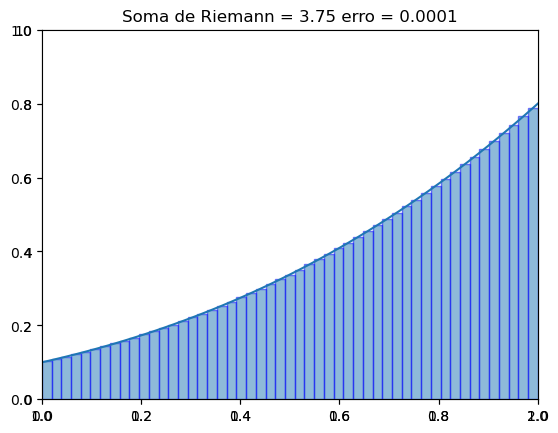

In [27]:
# Calcula a integral de x^3 entre 1 e 2
animate(n=50, a=1, b=2, func=f, verdadeiro_valor=3.75);

Vemos que o erro foi de apenas 0.0001.

### Questão 2

Nas aulas de cálculo da EBAC foi mostrada a regra do tombo em derivadas de polinômios. Nesta regra temos a relação:
 
$$ (a \cdot x^{b})' = a \cdot b \cdot x^{b - 1} $$ 

No caso de integrais, temos uma relação análoga à demonstrada acima, tendo como diferença a operação que a potência aplica na equação. Ao invés de estar multiplicando, ela estará dividindo após a integral:

$$ \int a \cdot x^{b} = \frac{a}{b} \cdot x^{b + 1} + C $$

Onde C é uma constante. Aplicando essa relação na função $x^{3}$ entre os pontos 1 e 2, temos:

$$ \int x^{3} = \frac{x^4}{4} $$

$$ \int_{1}^{2} x^{3} = \frac{2^4}{4} - \frac{1^4}{4} $$

$$ \int_{1}^{2} x^{3} = \frac{15}{4} = 3.75 $$